In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [ ]:
#raw_data['Admitted'] = raw_data['Admitted'].replace(['Yes', 'No'], [1, 0])
#or, raw_data['Admitted'] = raw_data['Admitted'].map({'Yes': 1, 'No': 0})
raw_data['Admitted'].head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    0
Name: Admitted, dtype: int64

In [ ]:
data = raw_data
y = data['Admitted']
x1 = data['SAT']

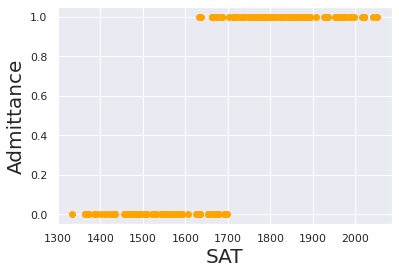

In [ ]:
plt.scatter(x1,y, c='orange')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admittance', fontsize=20)
plt.show()

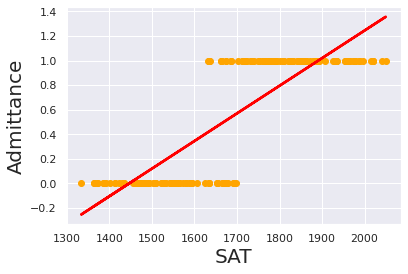

In [ ]:
x = sm.add_constant(x1)
reg_ = sm.OLS(y,x)
results = reg_.fit()

plt.scatter(x1,y,c='orange')
yhat = x1*results.params[1]+results.params[0]

plt.plot(x1,yhat,lw=2.5,c='red')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admittance', fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


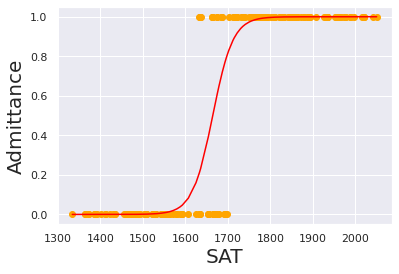

In [ ]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
  return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,c='orange')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admittance', fontsize=20)
plt.plot(x_sorted, f_sorted,c='red')
plt.show()

In [ ]:
x = sm.add_constant(x1)
reg_ = sm.Logit(y,x)
results = reg_.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.7992
Time:                        01:14:41   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**BATAS SUCI**

In [ ]:
raw_data = pd.read_csv('Example-bank-data.csv')
raw_data = raw_data.drop(['Unnamed: 0'], axis=1)
raw_data['y'] = raw_data['y'].map({'yes': 1, 'no': 0})
data = raw_data
data.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


In [ ]:
y = data['y']
x1 = data['duration']

x = sm.add_constant(x1)
reg = sm.Logit(y,x)
results = reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Aug 2021   Pseudo R-squ.:                  0.2121
Time:                        03:33:51   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [ ]:
y_list = list(y)
print(y_list.count(1))
print(y_list.count(0))
print(y.shape[0])

259
259
518


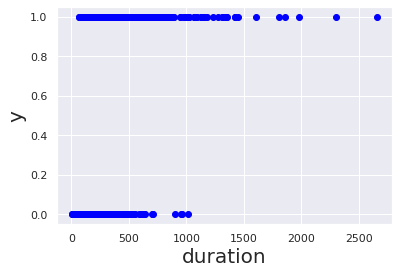

In [ ]:
plt.scatter(x1,y,c='blue')
plt.xlabel('duration', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

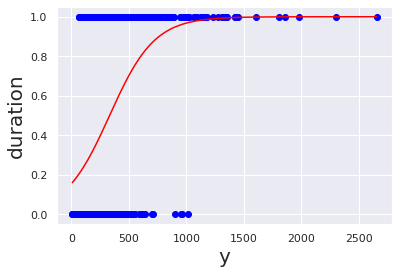

In [ ]:
def f(x, b0, b1):
  return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results.params[0], results.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,c='blue')
plt.xlabel('y', fontsize=20)
plt.ylabel('duration', fontsize=20)
plt.plot(x_sorted,f_sorted,c='red')
plt.show()

In [ ]:
bank_data = pd.read_csv('Bank-data.csv')
bank_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [ ]:
bank_data = bank_data.drop('Unnamed: 0', axis=1)
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})
bank_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [ ]:
estimators = ['interest_rate', 'march', 'credit', 'previous', 'duration']

x1 = bank_data[estimators]
y = bank_data['y']

In [ ]:
x = sm.add_constant(x1)
reg_logit = sm.Logit(y,x)
results = reg_logit.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2021-08-19 03:54 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

In [ ]:
def confusion_matrix(data,actual_values,model):
  pred_values = model.predict(data)
  bins = np.array([0,0.5,1])
  cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  return cm, accuracy

In [ ]:
confusion_matrix(x,y,results)

(array([[218.00, 41.00],
        [30.00, 229.00]]), 0.862934362934363)

**BATAS SUCI**

In [ ]:
binary_data = pd.read_csv('2.02. Binary predictors.csv')
binary_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [ ]:
binary_data['Admitted'] = binary_data['Admitted'].replace(['Yes', 'No'],[1, 0])
binary_data['Gender'] = binary_data['Gender'].map({'Male': 0, 'Female': 1})
binary_data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [ ]:
b = binary_data['Admitted']
a1 = binary_data['Gender']
a = sm.add_constant(a1)
reg_log = sm.Logit(b,a)
results = reg_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Aug 2021   Pseudo R-squ.:                  0.1659
Time:                        04:14:34   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [ ]:
d = binary_data['Admitted']
c1 = binary_data[['SAT', 'Gender']]
c = sm.add_constant(c1)
reg_log = sm.Logit(d,c)
results = reg_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Thu, 19 Aug 2021   Pseudo R-squ.:                  0.8249
Time:                        04:14:35   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
np.set_printoptions(formatter={'float': lambda x: '{0:0.2f}'.format(x)})
results.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [ ]:
np.array(binary_data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
cm_df = pd.DataFrame(results.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [ ]:
actual0, actual1 = results.pred_table()
correct0, incorrect0 = actual0
incorrect1, correct1 = actual1
print('Correct prediction for 0 is {}, while for 1 is {}'.format(int(correct0),int(correct1)))
correct = correct0 + correct1
incorrect = incorrect0 + incorrect1
total = correct + incorrect
print('Therefore the misclassification rate for this data is: '+str((4+5)/168))
percentage = correct/total
print('Overall the model made an accurate prediction in {} out of {}, which makes it {} accurate'.format(int(correct),int(total),percentage))

Correct prediction for 0 is 69, while for 1 is 90
Therefore the misclassification rate for this data is: 0.05357142857142857
Overall the model made an accurate prediction in 159 out of 168, which makes it 0.9464285714285714 accurate


In [ ]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train
print('It is {:.0%}'.format(accuracy_train))

It is 95%
